In [20]:
import networkx as nx

def generate_graph_udpipe(file_path):

    G = nx.DiGraph()
    G.add_node(0, word="<root>", postag="NONE", deprel= "none")
    edges = []

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            if line != '\n':
                tuples = line.split()
                G.add_node(int(tuples[0]), word=tuples[1], postag=tuples[3], deprel=tuples[4])
                edges.append((int(tuples[2]), int(tuples[0])))
    
    G.add_edges_from(edges)
    return G

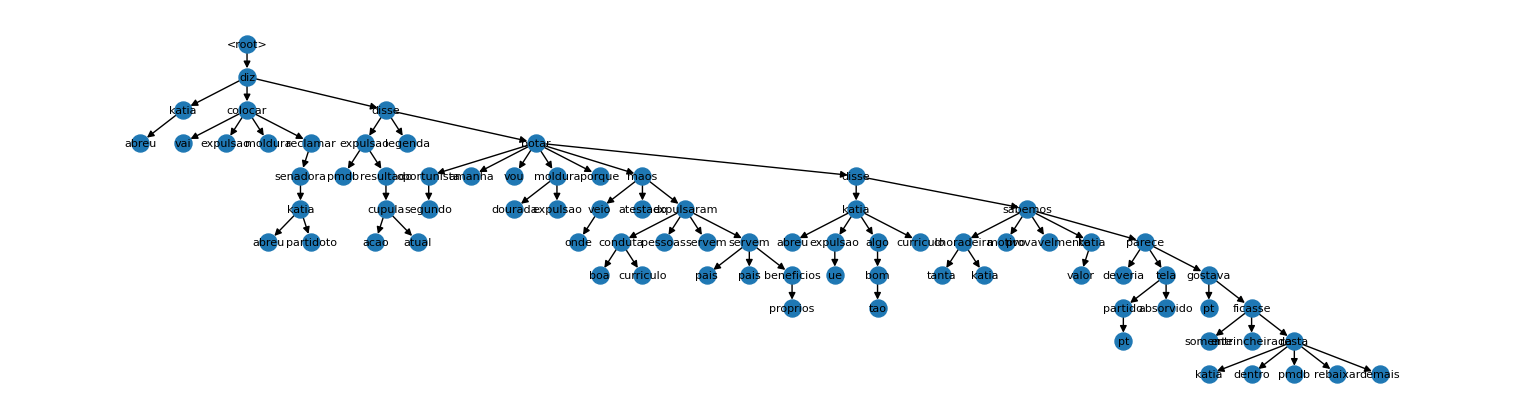

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
import os

G = generate_graph_udpipe(os.path.join('data', 'udpipe_tuples', 'fake', '1.txt'))
G.nodes(data=True)
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

labels = nx.get_node_attributes(G, 'word') 
plt.figure(figsize=(15,4))
nx.draw(G, pos, with_labels=True, arrows=True, node_size=150, labels=labels, font_size=8, font_family="sans-serif")
plt.savefig('../results/syntatic_graph.png', dpi=500)